# Pandas DataFrame for storing tweet feed (total 12 points)

Creating following date frame for storing tweets

- **climate_feed_df** DataFrame for storing tweet
- **retweeted_status_df** for storing original tweet

In [103]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp



In [168]:
# !wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl
# !curl https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [169]:
# !wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl
# !curl https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pkl file in the same directory as notebook

In [4]:
retweeted_status_df = pd.read_pickle("retweeted_status_df.pkl")

In [5]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'i...",1.093932e+18,1093931686998487040,31.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Communism is Fascism. Fighting Climate Change ...,True,"{'default_profile': False, 'protected': False,..."
4,NaN,None,Sat Feb 09 19:07:56 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2905.0,False,None,1.094312e+18,1094311957669265408,...,NaN,NaN,NaN,599.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Unmitigated climate change would literally des...,True,"{'default_profile': True, 'protected': False, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,None,Sat Feb 09 20:56:39 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,1.0,False,None,1.094339e+18,1094339317324017665,...,NaN,NaN,NaN,1.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",72% of Americans are 'very worried' about clim...,False,"{'default_profile': True, 'protected': False, ..."
9995,NaN,None,Thu Feb 07 20:27:55 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,3491.0,False,None,1.093607e+18,1093607309606076416,...,NaN,NaN,NaN,482.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@JFaurall @MgBenchjeweler @SpeakerPelosi Calif...,True,"{'default_profile': True, 'protected': False, ..."
9996,NaN,None,Sat Feb 09 18:33:00 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,12586.0,False,None,1.094303e+18,1094303164805799936,...,NaN,NaN,NaN,2801.0,False,NaN,"<a href=""https://about.twitter.com/products/tw...",President Trump believes we should listen to f...,True,"{'default_profile': False, 'protected': False,..."
9997,NaN,None,Fri Feb 08 22:15:50 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,4249.0,False,None,1.093997e+18,1093996855111966720,...,"{'favorited': False, 'favorite_count': 551, 'i...",1.093893e+18,1093893115633647616,642.0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wait til he hears how much climate change is g...,False,"{'default_profile': False, 'protected': False,..."


In [6]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339630500012033,1094339630500012033,...,NaN,NaN,NaN,1,False,1.094339e+18,"<a href=""http://twitter.com/download/android"" ...",RT @fromhello2hello: 72% of Americans are 'ver...,False,888112320097918976
9995,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339629107400704,1094339629107400704,...,NaN,NaN,NaN,482,False,1.093607e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @...,False,3324836714
9996,None,None,Sat Feb 09 20:57:53 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339627316641794,1094339627316641794,...,NaN,NaN,NaN,2801,False,1.094303e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SenSanders: President Trump believes we sh...,False,1487109794
9997,None,None,Sat Feb 09 20:57:51 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339619569557504,1094339619569557504,...,NaN,1093893115633647616,1093893115633647616,642,False,1.093997e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @KateAronoff: Wait til he hears how much cl...,False,4737089913


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [7]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) replace None with nan in climate_feed_df. Also display some random rows.


In [8]:
# write code here
climate_feed_df.replace(to_replace='None', value=np.nan, inplace=True)
climate_feed_df.fillna(value=np.nan, inplace=True)
climate_feed_df.sample(n = 10)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
7766,NaN,NaN,Sat Feb 09 21:41:28 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094350596298231810,1094350596298231810,...,NaN,NaN,NaN,2799,False,1.094303e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @SenSanders: President Trump believes we sh...,False,188994700
5677,NaN,NaN,Sat Feb 09 22:23:14 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094361105810436098,1094361105810436098,...,NaN,NaN,NaN,23,False,1.094302e+18,"<a href=""http://twitter.com/download/android"" ...","RT @ProfTimStephens: “more than anyone else, A...",False,511866824
1746,NaN,NaN,Sat Feb 09 23:43:52 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094381399698796545,1094381399698796545,...,NaN,NaN,NaN,350,False,1.094335e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SiddonsDan: “Does God’s creation not inclu...,False,784509479156981760
6307,NaN,NaN,Sat Feb 09 22:10:02 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094357783871455233,1094357783871455233,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@Prankster36 @BPinkham @jsmooth995 @AOC https:...,False,16067160
4380,NaN,NaN,Sat Feb 09 22:51:02 +0000 2019,"{'hashtags': [{'indices': [0, 13], 'text': 'Gr...",NaN,0,False,NaN,1094368101544603648,1094368101544603648,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",#GreenNewDeal =continuation of what #DNC extre...,True,47532188
402,NaN,NaN,Sun Feb 10 00:09:05 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,0,False,NaN,1094387744716017667,1094387744716017667,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",No more shinny? Thousands of lakes are losing ...,False,224438454
2294,NaN,NaN,Sat Feb 09 23:34:04 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094378930960625665,1094378930960625665,...,NaN,NaN,NaN,3,False,1.094378e+18,"<a href=""http://twitter.com/download/android"" ...","RT @JensWieting: ""Climate change and climate p...",False,3272826896
8161,NaN,NaN,Sat Feb 09 21:32:52 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094348432083480577,1094348432083480577,...,NaN,NaN,NaN,350,False,1.094335e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @SiddonsDan: “Does God’s creation not inclu...,False,19974832
7400,NaN,NaN,Sat Feb 09 21:48:14 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094352297742733312,1094352297742733312,...,NaN,NaN,NaN,27,False,1.094273e+18,"<a href=""http://twitter.com/download/android"" ...",RT @NiskanenCenter: A price signal such as a c...,False,4579167073
2834,NaN,NaN,Sat Feb 09 23:23:55 +0000 2019,"{'hashtags': [{'indices': [58, 71], 'text': 'G...",NaN,0,False,NaN,1094376378017796096,1094376378017796096,...,NaN,1093847317067808769,1093847317067808769,105,False,1.093957e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @hrtablaze: Great thread. Please read and ...,False,1061715383483154432


Working with only selected attributes.

In [9]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [176]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
5823,Sat Feb 09 22:20:10 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '835252426265481216', 'name': 'Robert Macfarlane', 'screen_name': 'RobGMacfarlane', 'indices': [3, 18], 'id': 835252426265481216}], 'urls': [], 'symbols': []}",1.093793e+18,False,48205761,"RT @RobGMacfarlane: ""Forests’ power to store carbon dioxide through the simple process of tree growth is staggering: one tree can store an…"
5130,Sat Feb 09 22:33:32 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '127483019', 'name': 'PTI', 'screen_name': 'PTIofficial', 'indices': [3, 15], 'id': 127483019}], 'urls': [], 'symbols': []}",1.094192e+18,False,34632535,RT @PTIofficial: Prime Minister Imran Khan has launched the Spring 2019 Tree Plantation Drive at Balloki\n\nAdvisor to PM on Climate change @…
4886,Sat Feb 09 22:39:02 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,False,23030523,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…
4078,Sat Feb 09 22:58:07 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}], 'urls': [], 'symbols': []}",1.094303e+18,False,1508490949,RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
7464,Sat Feb 09 21:47:04 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '36938886', 'name': 'Maggie Romuld', 'screen_name': 'rivrchik', 'indices': [3, 12], 'id': 36938886}, {'id_str': '27103822', 'name': 'University of Washington', 'screen_name': 'UW', 'indices': [125, 128], 'id': 27103822}, {'id_str': '74474794', 'name': 'EurekAlert!', 'screen_name': 'EurekAlert', 'indices': [129, 140], 'id': 74474794}], 'urls': [{'indices': [97, 120], 'url': 'https://t.co/ea0dxycYoe', 'display_url': 'bit.ly/2N0uHn2', 'expanded_url': 'http://bit.ly/2N0uHn2'}], 'symbols': []}",1.094264e+18,False,148439712,RT @rivrchik: Rating riverside corridors -- the 'escape routes' for animals under climate change https://t.co/ea0dxycYoe via @UW @EurekAlert
4902,Sat Feb 09 22:38:39 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '725470482334535680', 'name': 'Harvey Mushman', 'screen_name': 'GreenCap13', 'indices': [3, 14], 'id': 725470482334535680}], 'urls': [], 'symbols': []}",1.094364e+18,False,553354841,RT @GreenCap13: YOUR DAILY REMINDER\nI know the LNP keep swapping PMs but it's same MPs and\nLNP GOV HAVE BEEN IN POWER FOR 6 YEARS\nYOU ARE N…
2709,Sat Feb 09 23:26:25 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}], 'urls': [], 'symbols': []}",1.094212e+18,False,2472618817,RT @marklevinshow: The insane Democrat Left. “Climate change” was always the political pathway drug to fundamentally destroying our free s…
873,Sun Feb 10 00:00:12 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '1082006962995429383', 'name': 'stuntdaddy_42', 'screen_name': 'stuntdaddy_42', 'indices': [3, 17], 'id': 1082006962995429383}, {'id_str': '2497547378', 'name': 'Justice Faurall', 'screen_name': 'JFaurall', 'indices': [19, 28], 'id': 2497547378}, {'id_str': '3073664870', 'name': 'Michael Shelton', 'screen_name': 'MgBenchjeweler', 'indices': [29, 44], 'id': 3073664870}, {'id_str': '15764644', 'name': 'Nancy Pelosi', 'screen_name': 'SpeakerPelosi', 'indices': [45, 59], 'id': 15764644}], 'urls': [], 'symbols...",1.093607e+18,False,1056611458832891905,RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @SpeakerPelosi California was given hundreds of millions of dollars over the years to prevent…
8340,Sat Feb 09 21:29:11 +0000 2019,"{'h

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [177]:
# write code here
# convert created_at to date time type
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])

In [10]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
7928,Sat Feb 09 21:37:40 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,863897941,@JuddApatow @katherinefugate He does not deny ...
5198,Sat Feb 09 22:32:15 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094312e+18,False,47516496,RT @kenklippenstein: Unmitigated climate chang...
4300,Sat Feb 09 22:53:06 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,708727154800984064,https://t.co/2iLXUeXCXO what a fucking moron...
6661,Sat Feb 09 22:02:39 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094353e+18,False,955932814486077442,RT @Advocate0914: @hitechjunkie @CillizzaCNN @...
333,Sun Feb 10 00:10:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093578e+18,False,1862151499,RT @brutamerica: Look what 16-year old @GretaT...
2767,Sat Feb 09 23:25:22 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,71693621,Hey @RonPlacone @miserablelib @jimmy_dore When...
2318,Sat Feb 09 23:33:33 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094376e+18,False,917934138296094722,RT @drawandstrike: THIS is why on almost every...
5292,Sat Feb 09 22:30:14 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,False,15124373,"Here's a statistic: On Earth, 18 of the last 1..."
4784,Sat Feb 09 22:41:02 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,False,27146861,Harrison Ford warns of apocalyptic catastrophe...
5224,Sat Feb 09 22:31:45 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,False,1020299117543723009,@SenSanders PROVIDE GLOBAL WARMING..WAIT NO......


Checking datatype again

In [11]:
climate_feed_df.dtypes

created_at           object
entities             object
retweeted_status    float64
truncated            object
user_id               int64
text                 object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [12]:
# write code here
# climate_feed_df.info()

climate_feed_df[[column for column in ['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]]].isna().sum()

created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a columns named hashtags. Values in this columns should be command separated values of **text** attribute in **hashtags**  value.
 - Create a columns named user_mentions.Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [13]:
from ast import literal_eval
# write code here

climate_feed_df['entities'] = climate_feed_df.entities.apply(lambda x: literal_eval(str(x)))

In [14]:
type(climate_feed_df['entities'][0])

dict

# Cleaning tweets

Let's see some random tweets

In [15]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
# climate_feed_df['text'].sample(100)
climate_feed_df2 = pd.read_pickle('q5_dataframe.pkl')
climate_feed_df2['text'].sample(100)



7239                                      RT @chriskkenny: Court denies coal mine on grounds of climate change...give me a break https://t.co/r1R9ZJk5Kw
1450        RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…
9909        RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…
4321         RT @RoKhanna: Anyone who denies that climate change exists is ignoring the facts: The last five years have been the hottest ever recorded.…
526         RT @TheEconomist: Oil and gas demand is ramping up while climate change gets harder to ignore. It’s time to tax carbon. Our cover this week…
                                                                              ...                                                                       
9558    RT @ImranKhanPTI: We are launching our #Plant4Pakistan programme &amp; rec

**Example of tweet not truncated**

In [16]:
climate_feed_df2['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [17]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the original tweet text

In [18]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [19]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(points 3.5= 1(use of requests and text extraction from right html element)+.5+1+1 ) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [20]:
# Write code here
# climate_feed_df2['original_tweet_text'] = np.nan
climate_feed_df2.head()

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408


In [189]:
# print(retweeted_status_df.id[9])
# print(climate_feed_df.retweeted_status.loc[9])
#
# text = retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[9]].text.iloc[0]
# [text]

import requests

text_list = []
# for i in range(1, len(climate_feed_df.retweeted_status)):
for i in range(1, len(climate_feed_df2.original_tweet_id_str)):
    # if climate_feed_df.retweeted_status.loc[i] == retweeted_status_df.id
    if climate_feed_df2.original_tweet_id_str.loc[i] in retweeted_status_df.id.values:
        # retweeted_status_df.id[i]
        text = [[retweeted_status_df[retweeted_status_df['id'] == climate_feed_df2['original_tweet_id_str'].loc[i]].text.iloc[0]]]
        link = re.findall(r'(https?://[^\s]+)', text[0][0])
        if link:
            #go to link with requests and save full text as text
            request = requests.get(link[0])
            link_text = request.text
            #increase text_list with link text
            text_list += link_text
        else:
            #else if increase text_list with text
            text_list += text
        # loc = climate_feed_df.retweeted_status[i].iloc()
        # loc = retweeted_status_df.id.iloc(climate_feed_df.retweeted_status[i])

        # url_list += url
        # climate_feed_df['original_tweet_text'][i] = text
    # else:
        # loc = retweeted_status_df.id.iloc(climate_feed_df.retweeted_status[i])
        # text_list += []


In [190]:
# url_string = text_list[0][0][-23:]
# url_string


# url =  re.findall(r'(https?://[^\s]+)', text[0][0])
# url[0]
# response = requests.get(url[0])

# print(response.text)
# url_list = []
# for text in text_list:
#     url_list += re.findall(r'(https?://[^\s]+)', text[0])
#
# len(url_list)

In [191]:
# if climate_feed_df.retweeted_status.loc[9998] in retweeted_status_df['id']:
#     print('True')
# else:
#     print('False')

# climate_feed_df.retweeted_status.loc[9998]

In [192]:
# climate_feed_df.info()
# climate_feed_df.retweeted_status[1]

# Q 6(point 1= .5+.5) Remove all the reference  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [21]:
# write code here
import requests
import re
# need to replace \n with . and take out user mentions and url links
climate_feed_df2['FINAL_tweet_text'] = np.nan
for i in range(len(climate_feed_df2['original_tweet_text'])):
    original_string = str(climate_feed_df2['original_tweet_text'][i])
    cleaned_string_1 = re.sub("@[A-Za-z0-9]+","", original_string)
    cleaned_string_2 = re.sub("https?\://\S+","", cleaned_string_1)
    cleaned_string_3 = re.sub("\n",".", cleaned_string_2)
    cleaned_string_4 = re.sub("\. \.\.",". ", cleaned_string_3)
    cleaned_string_5 = re.sub("\. \.",".", cleaned_string_4)
    climate_feed_df2['FINAL_tweet_text'][i] = cleaned_string_5


climate_feed_df2



I:\Anaconda\envs\dash\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
I:\Anaconda\envs\dash\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,FINAL_tweet_text
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,…"
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977,This is the same idiot who thought.The southern Alberta chinook was climate change lol.
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS…"
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def…
...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/7

In [194]:
# re.findall(r'(https?://[^\s]+)', climate_feed_df.text[0]) # finds the link for us to remove in loop
# re.sub(r'RT \S+ ?','',climate_feed_df.text[2])
# re.sub(r'#\w+ ?','',climate_feed_df.text[0])
# re.sub(r'.@\w+ ?','',climate_feed_df.text[0])
# re.sub(r'(https?://[^\s]+)','',climate_feed_df.text[2])

# for i in range(len(climate_feed_df.text)):
#     re.sub(r'RT \S+ ?','', climate_feed_df['text'][i])
#     re.sub(r'#\w+ ?','',climate_feed_df.text[i])
#     re.sub(r'.@\w+ ?','',climate_feed_df.text[i])
#     re.sub(r'(https?://[^\s]+)','',climate_feed_df.text[i])

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words doesn't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [26]:
# wite code here
climate_feed_df2['FINAL_tweet_text']


0                                                                                                                        None
1       The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… 
2                                    This is the same idiot who thought.The southern Alberta chinook was climate change lol. 
3       Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… 
4       Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… 
                                                                ...                                                          
9994                                                                72% of Americans are 'very worried' about climate change 
9995                                             California was given hundreds of millions of dollars over the years t

# Emoji detection

See this example of emoji as unicode characters

In [40]:
climate_feed_df2['FINAL_tweet_text'].loc[3934]

'People in agreement that climate change is a national security threat:..✔️ scientists.✔️ the U.S. military.✔️ the U… '

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [28]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [32]:
emoji_regex.findall(climate_feed_df2['FINAL_tweet_text'].loc[3934])

[]

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [ ]:
# ! pip install emoji

In [82]:
import unicodedata
import emoji

In [76]:
# emoji.UNICODE_EMOJI

# Q 8(1 point) Create a column  called *emoji*.  This coumns should contains a list of tuples for emoji detected in *final_tweet_text*. First element of tuple is the emoji detected and second is the text describing the emoji.

In [89]:
# write code here
climate_feed_df2['emoji'] = np.nan
climate_feed_df2['emoji'] = climate_feed_df2['emoji'].astype(object)
emojis_list = []
emojis_dict = {}
for lang in emoji.UNICODE_EMOJI:    
    for key in emoji.UNICODE_EMOJI[lang]:
        emojis_list.append(key)
        emojis_dict[key] = emoji.UNICODE_EMOJI[lang][key]
        
emoji_regex = re.compile('|'.join(re.escape(p) for p in emojis_list))

for i in range(len(climate_feed_df2['emoji'])):
    text = climate_feed_df2['FINAL_tweet_text'].loc[i]
    result = emoji_regex.findall(text)
    result1 = set(result)
    tuples = []
    for item in result1:
        tuples.append((item, emojis_dict[item]))
        
    if len(tuples) > 0:
        print(i, tuples)
        
    climate_feed_df2.at[i, 'emoji'] = tuples
    


58 [('🌏', ':asia_e_australia:')]
62 [('🤣', ':ridere_a_crepapelle:')]
85 [('🤣', ':ridere_a_crepapelle:')]
90 [('🤔', ':faccina_concentrata:')]
133 [('🚫', ':segnale_di_divieto:')]
182 [('👏', ':mani_che_applaudono:')]
199 [('🤣', ':ridere_a_crepapelle:')]
282 [('🚫', ':segnale_di_divieto:')]
283 [('🤣', ':ridere_a_crepapelle:')]
285 [('🤣', ':ridere_a_crepapelle:')]
311 [('😉', ':faccina_che_fa_l’occhiolino:')]
339 [('🤦\u200d♂️', ':uomo_esasperato:')]
380 [('🤣', ':ridere_a_crepapelle:')]
381 [('🤣', ':ridere_a_crepapelle:')]
393 [('🤣', ':ridere_a_crepapelle:')]
412 [('🤣', ':ridere_a_crepapelle:')]
418 [('🌎', ':america:')]
427 [('🤣', ':ridere_a_crepapelle:')]
428 [('🤣', ':ridere_a_crepapelle:')]
488 [('🤣', ':ridere_a_crepapelle:')]
524 [('🌍', ':europa_e_africa:')]
561 [('🤣', ':ridere_a_crepapelle:')]
581 [('🤣', ':ridere_a_crepapelle:')]
618 [('🤣', ':ridere_a_crepapelle:')]
672 [('🌪', ':tornado:'), ('🙈', ':non_vedo:')]
725 [('🤣', ':ridere_a_crepapelle:')]
736 [('🤣', ':ridere_a_crepapelle:')]
754 [

5828 [('🔹', ':rombo_blu_piccolo:')]
5913 [('🇬🇧', ':bandiera_regno_unito:'), ('🤔', ':faccina_concentrata:')]
5993 [('🏼', ':carnagione_abbastanza_chiara:'), ('👇', ':indice_abbassato:')]
6075 [('👏', ':mani_che_applaudono:')]
6187 [('👉', ':indice_verso_destra:')]
6207 [('🏽', ':carnagione_olivastra:'), ('✊', ':pugno:')]
6606 [('🌏', ':asia_e_australia:')]
6626 [('👏', ':mani_che_applaudono:')]
6651 [('🏽', ':carnagione_olivastra:'), ('✊', ':pugno:')]
6739 [('✔', ':check_mark:')]
6764 [('🤔', ':faccina_concentrata:')]
6836 [('🌱', ':germoglio:'), ('🌹', ':rosa:')]
6884 [('👉', ':indice_verso_destra:')]
6895 [('👏', ':mani_che_applaudono:')]
6949 [('🔹', ':rombo_blu_piccolo:')]
6985 [('👉', ':indice_verso_destra:')]
7015 [('❤', ':red_heart:'), ('🌏', ':asia_e_australia:')]
7078 [('👏', ':mani_che_applaudono:')]
7252 [('🔹', ':rombo_blu_piccolo:')]
7334 [('👏', ':mani_che_applaudono:')]
7429 [('😱', ':faccina_terrorizzata:')]
7467 [('👏', ':mani_che_applaudono:')]
7495 [('👏', ':mani_che_applaudono:')]
7510 [(

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,FINAL_tweet_text,emoji
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None,None,[]
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,…",[]
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977,This is the same idiot who thought.The southern Alberta chinook was climate change lol.,[]
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS…",[]
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def…,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehu

In [99]:
climate_feed_df2.loc[955]

created_at                                                                                                                                                                                                                                                                                                                                               2019-02-09 23:58:34
entities                 {'hashtags': [], 'user_mentions': [{'id_str': '828279594843308034', 'name': 'Weekly Humorist', 'screen_name': 'WeeklyHumorist', 'indices': [3, 18], 'id': 828279594843308034}], 'urls': [{'indices': [103, 126], 'url': 'https://t.co/vVPoFY84tF', 'display_url': 'eepurl.com/ggSe-j', 'expanded_url': 'http://eepurl.com/ggSe-j'}], 'symbols': []}
retweeted_status                                                                                                                                                                                                                                                              

# We'll use wordcloud  to do elemetary exploratory data analysis(EDA). We'll do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [ ]:
# !pip install wordcloud

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [92]:
%matplotlib inline

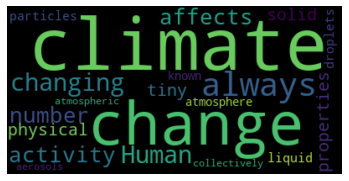

In [95]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [110]:
import contractions

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JKH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JKH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


Stop Word is
Stop Word also
lemmatizer affects affect
Stop Word through
lemmatizer changes change
Stop Word in
Stop Word the
Stop Word and
lemmatizer properties property
Stop Word of
lemmatizer particles particle
Stop Word and
lemmatizer droplets droplet
Stop Word in
Stop Word the
Stop Word as
lemmatizer aerosols aerosol
climate change. Climate always changing. Human activity affect climate change number physical property tiny solid particle liquid droplet atmosphere, known collectively atmospheric aerosol


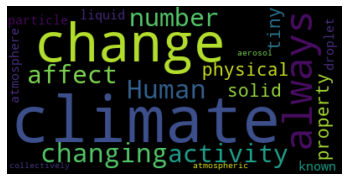

In [114]:
# write code here
# I have include a sample ooutput. Your output can be different

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words()
# print(stop_words)

expanded_words = []    
for word in text.split():
    # using contractions.fix to expand the shotened words    
    if not word in stop_words: # 2. stop words removal
        # 1. expanding contractions
        word1 = lemmatizer.lemmatize(word)
        if word != word1:
            print("lemmatizer", word, word1)
        expanded_words.append(contractions.fix(word1))   
    else:
        print("Stop Word", word)
    
expanded_text = ' '.join(expanded_words)
print(expanded_text)

wordcloud = WordCloud().generate(expanded_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()


# Homework ends
# Final thoughts
He haven't done all the cleanup or used all the attributes for EDA.I just want to highlight one more clean up activity related to language.

In [ ]:
import enchant

In [ ]:
# dictionary = enchant.Dict('en')

In [ ]:
# climate_feed_df['text'].loc[5217]

In [ ]:
# [dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]